In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
df_sarcastic=pd.read_csv("Sarcasm_Hindi_Tweets-SARCASTIC.csv")

In [4]:
df_sarcastic['Label']="Sarcastic"

In [5]:
df_sarcastic=df_sarcastic[["text","Label"]]

In [6]:
df_sarcastic

,text,Label
0,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ल...",Sarcastic
1,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ल...",Sarcastic
2,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ल...",Sarcastic
3,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ल...",Sarcastic
4,"हमारे गांव में एक मास्टर जी रहते थे, वो मोहल्ल...",Sarcastic
...,...,...
6046,Sone Ki Chain Important Nhi Hoti\nBalki\nChain...,Sarcastic
6047,@IACAbhi @myvivek1989 kya baat kr rhe ho..\n\n...,Sarcastic
6048,Corona se Bachne Ke Liye Ghar par rahe\n.\n.\n...,Sarcastic
6049,Me : kisi ne bataya tum kitni khubsurat ho?\n\...,Sarcastic


In [7]:
df_nonsarcastic=pd.read_csv("Sarcasm_Hindi_Tweets-NON-SARCASTIC.csv")

In [8]:
df_nonsarcastic['Label']="Non-Sarcastic"

In [9]:
df_nonsarcastic=df_nonsarcastic[["text","Label"]]

In [10]:
df_nonsarcastic

,text,Label
0,🍃🌼🍃🌼🍃🌼🍃🌼🍃🌼🍃\n\nकभी न बुझती है \nवो प्यास है #ज...,Non-Sarcastic
1,"डिप्रेशन के शुरुआती आठ लक्षण, उदाहरण और इलाज\n...",Non-Sarcastic
2,@FaiziJee98 Aaj apki saalgirah hy nahi 🙊😛 or j...,Non-Sarcastic
3,🍃🌼🍃🌼🍃🌼🍃🌼🍃🌼🍃\n\nकभी न बुझती है \nवो प्यास है #ज...,Non-Sarcastic
4,#Happy rathyatra https://t.co/flLVnffvOJ,Non-Sarcastic
...,...,...
10123,स्वर्गीय श्री सुशांत सिंह राजपूत ने हमें छिछोर...,Non-Sarcastic
10124,बॉलीवुड एक्टर #सुशांत_सिंह_राजपूत ने #फांसी लग...,Non-Sarcastic
10125,#SushantSinghRajput #Suicide क्यों?? चमक धमक ...,Non-Sarcastic
10126,हर हाल में #खुश रहना सीख लो🙃\n उस दिल क...,Non-Sarcastic


In [11]:
import re
english_pattern = re.compile(r'[a-zA-Z]+')
hindi_range = r'\u0900-\u097F'

# Clean Hindi tweets
def clean_hindi(tweet):
    cleaned_tweet = ""
    for word in tweet.split():
        if english_pattern.match(word):
            cleaned_tweet += word + " "
        else:
            cleaned_word = re.sub(r'[^'+hindi_range+'\s]', '', word)
            cleaned_tweet += cleaned_word + " "
    return cleaned_tweet

In [12]:
df_sarcastic['text'] = df_sarcastic['text'].apply(clean_hindi)
df_nonsarcastic['text'] = df_nonsarcastic['text'].apply(clean_hindi)

In [13]:
# Remove URLs
df_sarcastic['text'] = df_sarcastic['text'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))
df_nonsarcastic['text'] = df_nonsarcastic['text'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))

# Remove usernames or mentions
df_sarcastic['text'] = df_sarcastic['text'].apply(lambda x: re.sub(r'@[^\s]+', '', x))
df_nonsarcastic['text'] = df_nonsarcastic['text'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))

# Remove hashtags
df_sarcastic['text'] = df_sarcastic['text'].apply(lambda x: re.sub(r'#\w+', '', x))
df_nonsarcastic['text'] = df_nonsarcastic['text'].apply(lambda x: re.sub(r'http\S+|www\S+', '', x))

In [14]:
df_sarcastic['text'] = df_sarcastic['text'].str.lower()
df_nonsarcastic['text'] = df_nonsarcastic['text'].str.lower()

In [15]:
df_sarcastic['text'] = df_sarcastic['text'].apply(lambda x: re.sub(r'\d+', '', x))
df_nonsarcastic['text'] = df_nonsarcastic['text'].apply(lambda x: re.sub(r'\d+', '', x))

In [16]:
import regex

def remove_emojis(text):
    # Remove emojis using regular expression
    cleaned_text = regex.sub(r'\p{So}', '', text)
    return cleaned_text

In [17]:
df_sarcastic['text'] = df_sarcastic['text'].apply(lambda x: remove_emojis(x))
df_nonsarcastic['text'] = df_nonsarcastic['text'].apply(lambda x: remove_emojis(x))

In [18]:
url_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')

In [19]:
df_sarcastic['text'] = df_sarcastic['text'].apply(lambda x: re.sub(url_pattern, '', x))
df_sarcastic['cleaned_text'] = df_sarcastic['text'].apply(lambda x: re.sub(email_pattern, '', x))

In [20]:

df_nonsarcastic['text'] = df_nonsarcastic['text'].apply(lambda x: re.sub(url_pattern, '', x))
df_nonsarcastic['cleaned_text'] = df_nonsarcastic['text'].apply(lambda x: re.sub(email_pattern, '', x))

In [21]:
import string
df_sarcastic['cleaned_text'] = df_sarcastic['cleaned_text'].apply(lambda x: ''.join(char for char in x if char not in string.punctuation))

In [22]:
df_nonsarcastic['cleaned_text'] = df_nonsarcastic['cleaned_text'].apply(lambda x: ''.join(char for char in x if char not in string.punctuation))

In [23]:
import nltk
from nltk.corpus import stopwords

In [24]:
nltk.download('stopwords')
nltk.download('punkt')

stopwords_english = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [25]:
stopwords_hindi = [
    "अंदर", "अत", "अपना", "अपनी", "अपने", "अभी", "आदि", "आप", "इत्यादि", "इन",
    "इनका", "इन्हीं", "इन्हें", "इन्होंने", "इस", "इसका", "इसकी", "इसके", "इसमें",
    "इसी", "इसे", "उन", "उनका", "उनकी", "उनके", "उनको", "उन्हीं", "उन्हें", "उन्होंने",
    "उस", "उसके", "उसी", "उसे", "एक", "एवं", "एस", "ऐसे", "और", "कर",
    "करता", "करते", "करना", "करने", "करें", "कहते", "कहा", "का", "काफ़ी", "कि",
    "कितना", "किन्हें", "किन्हों", "किया", "किर", "किस", "किसी", "किसे", "की", "कुछ",
    "कुल", "के", "को", "कोई", "कौन", "कौनसा", "गया", "घर", "जब", "जहाँ",
    "जा", "जितना", "जिधर", "जिन", "जिन्हें", "जिन्हों", "जिस", "जिसे", "जीतने", "जीतो",
    "तक", "तब", "तरह", "तिन्हें", "तिन्हों", "तिस", "तिसे", "तो", "तोह", "था",
    "थी", "थे", "दबारा", "दिया", "दुसरे", "देखा", "देखो", "दो", "द्वारा", "न",
    "नहीं", "ना", "निचे", "निहायत", "नीचे", "ने", "पर", "पहले", "पुरा", "पूरा",
    "पे", "फिर", "बनी", "बही", "बहुत", "बाद", "बाला", "बिलकुल", "भी", "भीतर",
    "मगर", "मानो", "मे", "में", "यदि", "यह", "यहाँ", "यही", "या", "यिह",
    "ये", "रखें", "रवासा", "रहा", "रहे", "ऱ्वासा", "लिए", "लिये", "लेकिन", "व",
    "वगेरह", "वर्ग", "वह", "वहाँ", "वहीं", "वाले", "वुह", "वे", "वग़ैरह", "संग",
    "सकता", "सकते", "सबसे", "सभी", "साथ", "साबुत", "साभ", "सारा", "से", "सो",
    "ही", "हुआ", "हुई", "हुए", "है", "हैं", "हो", "होता", "होती", "होते", "होना",
    "होने"
]

In [26]:
import nltk

# Delete and re-download the 'punkt' package
nltk.data.path = ['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/share/nltk_data', '/usr/local/lib/nltk_data']
nltk.download('punkt', force=True)  # Force download to fix corrupted files
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [27]:
df_sarcastic['cleaned_text'] = df_sarcastic['cleaned_text'].apply(lambda x: ' '.join(word for word in nltk.word_tokenize(x) if word.lower() not in stopwords_english and word.lower() not in stopwords_hindi))

In [28]:
df_nonsarcastic['cleaned_text'] = df_nonsarcastic['cleaned_text'].apply(lambda x: ' '.join(word for word in nltk.word_tokenize(x) if word.lower() not in stopwords_english and word.lower() not in stopwords_hindi))

In [29]:
df_nonsarcastic=df_nonsarcastic.loc[:6050]

In [30]:
data = pd.concat([df_sarcastic, df_nonsarcastic], axis=0)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['Label'], random_state=50)

In [32]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 65.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [33]:
pip install ktrain

In [34]:
pip install tf_keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 135.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [35]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = "1"

In [36]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 122.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 121.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorf

In [37]:
import tensorflow as tf
import ktrain
from ktrain import text
t = text.Transformer("monsoon-nlp/hindi-bert", maxlen=500, class_names=list(set(y_train.values)))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/572 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/58.9M [00:00<?, ?B/s]

In [38]:
trn = t.preprocess_train(X_train.to_numpy(), y_train.to_numpy())

preprocessing train...
language: hi
train sequence lengths:
	mean : 21
	95percentile : 32
	99percentile : 35


/usr/local/lib/python3.11/dist-packages/ktrain/utils.py:744: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/607k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False


In [39]:
evalr = t.preprocess_test(X_test.to_numpy(), y_test.to_numpy())

preprocessing test...
language: hi
test sequence lengths:
	mean : 21
	95percentile : 32
	99percentile : 35


In [40]:
model = t.get_classifier()

In [41]:
learner = ktrain.get_learner(model, train_data=trn, val_data=evalr, batch_size=6)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
1512/1512 [==============================] - 96s 48ms/step - loss: 0.6936 - accuracy: 0.4948
Epoch 2/10
1512/1512 [==============================] - 75s 49ms/step - loss: 0.6718 - accuracy: 0.6379
Epoch 3/10
1512/1512 [==============================] - 75s 49ms/step - loss: 0.3343 - accuracy: 0.9002
Epoch 4/10
1512/1512 [==============================] - 75s 49ms/step - loss: 0.1444 - accuracy: 0.9480
Epoch 5/10
1512/1512 [==============================] - 75s 49ms/step - loss: 0.4051 - accuracy: 0.7415
Epoch 6/10
1512/1512 [==============================] - 0s 144us/step - loss: 0.6964 - accuracy: 0.4286


done.
Visually inspect loss plot and select learning rate associated with falling loss


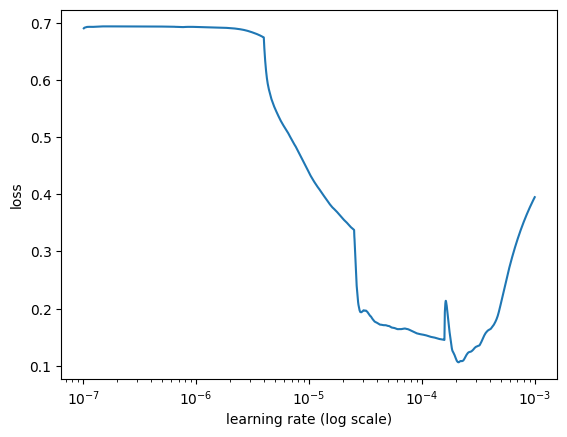

In [42]:
learner.lr_find(show_plot=True, max_epochs=10)

In [48]:
import ktrain.lroptimize.triangular
print(ktrain.lroptimize.triangular.__file__)

/usr/local/lib/python3.11/dist-packages/ktrain/lroptimize/triangular.py


In [50]:
import numpy as np
np.Inf = np.inf


In [52]:
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=evalr, batch_size=6)
learner.fit_onecycle(1e-4, 3)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/3
1513/1513 [==============================] - 98s 53ms/step - loss: 0.2981 - accuracy: 0.8692 - val_loss: 0.1093 - val_accuracy: 0.9686
Epoch 2/3
1513/1513 [==============================] - 76s 50ms/step - loss: 0.0751 - accuracy: 0.9759 - val_loss: 0.0398 - val_accuracy: 0.9874
Epoch 3/3
1513/1513 [==============================] - 77s 50ms/step - loss: 0.0096 - accuracy: 0.9969 - val_loss: 0.0034 - val_accuracy: 0.9983


In [53]:
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=evalr, batch_size=6)
learner.fit_onecycle(1.2e-4, 5)



begin training using onecycle policy with max lr of 0.00012...
Epoch 1/5
1513/1513 [==============================] - 99s 53ms/step - loss: 0.2402 - accuracy: 0.9073 - val_loss: 0.1337 - val_accuracy: 0.9508
Epoch 2/5
1513/1513 [==============================] - 77s 51ms/step - loss: 0.0671 - accuracy: 0.9766 - val_loss: 0.0230 - val_accuracy: 0.9944
Epoch 3/5
1513/1513 [==============================] - 77s 50ms/step - loss: 0.0364 - accuracy: 0.9877 - val_loss: 0.0235 - val_accuracy: 0.9888
Epoch 4/5
1513/1513 [==============================] - 78s 51ms/step - loss: 0.0155 - accuracy: 0.9948 - val_loss: 0.0045 - val_accuracy: 0.9987
Epoch 5/5
1513/1513 [==============================] - 79s 51ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 1.0425e-04 - val_accuracy: 1.0000


In [54]:
learner.save_model("sample_data/Model.hp5")

In [55]:
predictor = ktrain.get_predictor(learner.model, preproc=t)

In [56]:
import random
list_of_num=[]
for i in range(15):
  x = random.randint(1,100)
  list_of_num.append(x)

In [57]:
list_of_num

[50, 14, 31, 77, 97, 80, 18, 16, 55, 46, 82, 78, 41, 17, 87]

In [58]:
for i in list_of_num:
  print('Actual Text = ', X_test.iloc[i])
  print('\n')
  print("+"*50)
  print("Predicted Label = ",predictor.predict(X_test.iloc[i]))
  print('Actual Label = ',y_test.iloc[i])
  print("-"*50)

Actual Text =  agar tumhe aisa lage ki tumse dur jaa rahe hai ” gaand pe laat marke bhgao ”


++++++++++++++++++++++++++++++++++++++++++++++++++
Predicted Label =  Sarcastic
Actual Label =  Sarcastic
--------------------------------------------------
Actual Text =  हमें पढ़ाओ रिश्तों किताब पढ़ी बाप चेहरे झुर्रियाँ हम मेराज फ़ैज़ाबादी


++++++++++++++++++++++++++++++++++++++++++++++++++
Predicted Label =  Non-Sarcastic
Actual Label =  Non-Sarcastic
--------------------------------------------------
Actual Text =  ख़ुशनसीब तुम जो मन मार जी हो। जमाने लोगो भूख मार रखा है।।।।।


++++++++++++++++++++++++++++++++++++++++++++++++++
Predicted Label =  Sarcastic
Actual Label =  Sarcastic
--------------------------------------------------
Actual Text =  जो जख्म दिखते दुखते सुशांतसिंहराजपूत


++++++++++++++++++++++++++++++++++++++++++++++++++
Predicted Label =  Non-Sarcastic
Actual Label =  Non-Sarcastic
--------------------------------------------------
Actual Text =  अगर आपके छल उससे दुखी चाहिऐ 

In [59]:
learner.view_top_losses(n=4)

95/95 [==============================] - 6s 27ms/step


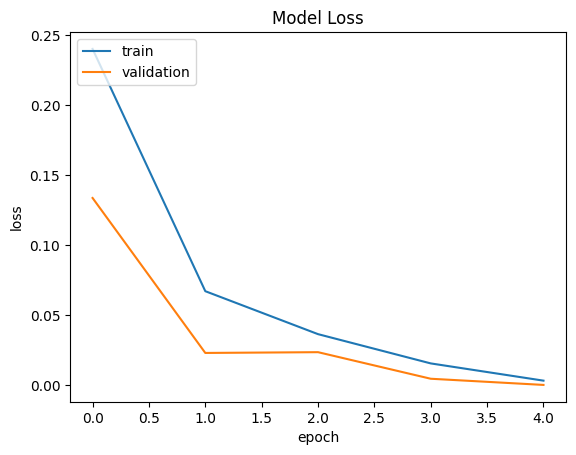

In [60]:
learner.plot()

In [61]:
learner.print_layers()

0 (trainable=True) : <transformers.models.electra.modeling_tf_electra.TFElectraMainLayer object at 0x7f321c2e1350>
1 (trainable=True) : <transformers.models.electra.modeling_tf_electra.TFElectraClassificationHead object at 0x7f31781f5550>


In [62]:
 from sklearn.metrics import classification_report, confusion_matrix

In [63]:
len(X_test)

3026

In [64]:
y_pred=[]
for i in range(len(X_test)):
  k=predictor.predict(X_test.iloc[i])
  y_pred.append(k)

In [65]:
y_pred

['Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Non-Sarcastic',
 'Sarcastic',
 'Sarcastic',
 'Non-Sarc

In [66]:
y_test

,Label
5525,Sarcastic
948,Sarcastic
3553,Non-Sarcastic
3687,Sarcastic
3500,Non-Sarcastic
...,...
5996,Sarcastic
2715,Sarcastic
674,Non-Sarcastic
5925,Non-Sarcastic


In [67]:
y_pred = pd.Series(y_pred)

In [68]:
y_pred

,0
0,Sarcastic
1,Sarcastic
2,Non-Sarcastic
3,Sarcastic
4,Non-Sarcastic
...,...
3021,Sarcastic
3022,Sarcastic
3023,Non-Sarcastic
3024,Non-Sarcastic


In [69]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_test = label_encoder.fit_transform(y_test)
label_encoder2 = LabelEncoder()
y_pred = label_encoder2.fit_transform(y_pred)


In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1512
           1       1.00      1.00      1.00      1514

    accuracy                           1.00      3026
   macro avg       1.00      1.00      1.00      3026
weighted avg       1.00      1.00      1.00      3026



In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

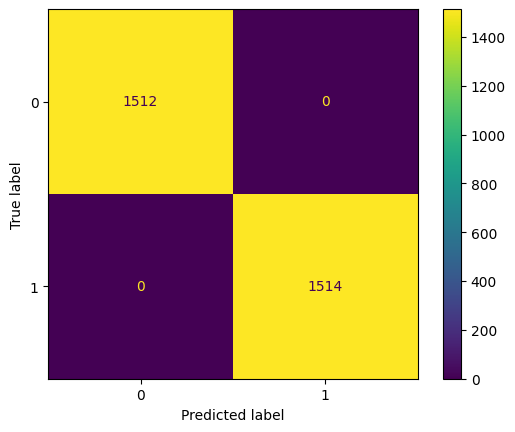

In [72]:
cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])
disp.plot()